<a href="https://colab.research.google.com/github/vazquezsilvana/Data-Science-II-EntregaFinal/blob/main/VazquezSilvana_EntregaFinalDSII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La adicción de los estudiantes a las redes sociales

## Introducción

El uso excesivo de redes sociales entre estudiantes ha despertado preocupación en ámbitos educativos y psicológicos. Diversos estudios señalan que este comportamiento puede afectar el rendimiento académico, la calidad del sueño, la salud mental y las relaciones interpersonales. Frente a esta problemática, surge la necesidad de contar con herramientas que permitan identificar tempranamente a los estudiantes en alto riesgo de adicción, para orientar intervenciones preventivas y acompañamiento institucional.


## Objetivo
Desarrollar un modelo de clasificación binaria capaz de predecir el riesgo de adicción a redes sociales en estudiantes.


# Importación de Librerias

In [1]:
#librerias para el manejo del dataset elegido.
import numpy as np
import pandas as pd

#librerias para los graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta tonos suaves de azul y verde
academic_palette = ["#1f77b4", "#2ca02c", "#17becf", "#98df8a", "#aec7e8", "#9edae5"]

# Configuración global de estilo
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette(academic_palette)

# ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap

# Columnas del dataset

**Student_ID/ID del estudiante**
Un identificador entero único asignado a cada encuestado para permitir la deduplicación y el seguimiento de registros individuales sin revelar información personal.

**Age/Edad**
La edad del estudiante en años completados al momento de la encuesta, utilizada para segmentar el análisis por grupo de edad y controlar las diferencias de desarrollo.

**Gender/Género**
El género autodeclarado por el estudiante, registrado como "Hombre" o "Mujer", para permitir desgloses demográficos en el uso y las mediciones de resultados.

**Academic_Level/Nivel académico**
El nivel educativo más alto en el que está matriculado actualmente el encuestado, con categorías: "Preparatoria", "Pregrado" o "Posgrado", lo que facilita análisis estratificados por etapa académica.

**Country/País**
El país de residencia donde el estudiante completó la encuesta, lo que permite realizar comparaciones entre países sobre el comportamiento y el impacto en las redes sociales.

**Avg_Daily_Usage_Hours/Promedio de horas de uso diario**
El promedio de horas diarias que el estudiante pasa en las redes sociales, calculado a partir de estimaciones de uso autodeclaradas entre semana y en fin de semana.

**Most_Used_Platform/Plataforma_Más_Usada**
La plataforma de redes sociales en la que el estudiante pasa más tiempo (p. ej., Instagram, Facebook, TikTok), utilizada para examinar los efectos específicos de cada plataforma.

**Affects_Academic_Performance/Afecta_Al_Rendimiento_Académico**
Un indicador binario (“Sí”/“No”) que refleja si el estudiante percibe que el uso de las redes sociales tiene un impacto negativo en su rendimiento académico.

**Sleep_Hours_Per_Night/Horas_De_Sueño_Por_Noche**
La duración promedio del sueño nocturno del encuestado en horas, proporcionada para investigar las correlaciones entre el tiempo frente a la pantalla y la calidad/cantidad del sueño.

**Mental_Health_Score/Puntuación_De_Salud_Mental**
Un número entero autoevaluado del 1 (malo) al 10 (excelente) que indica el bienestar mental general, lo que permite evaluar posibles asociaciones con los hábitos en redes sociales.

**Relationship_Status/Estado_Relacional**
El estado actual de la relación romántica del estudiante, categorizado como “Soltero”, “En_relación” o “Complicado”, para explorar el impacto de las redes sociales en la dinámica interpersonal.

**Conflicts_Over_Social_Media/Conflictos por las redes sociales**
El número de discusiones o desacuerdos que el estudiante informa haber tenido con familiares, amigos o parejas debido al uso de las redes sociales, lo que sirve como indicador de fricción social.

**Addicted_Score/Puntaje_de_Adicción**
Una puntuación compuesta de 1 (baja adicción) a 10 (alta adicción) basada en una escala de encuesta estandarizada (p. ej., la Escala de Adicción a las Redes Sociales de Bergen), que cuantifica el grado de uso problemático.

# Carga y visualización del Dataset elegido

Fuente: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

In [2]:
url = 'https://raw.githubusercontent.com/vazquezsilvana/Data-Science-II-EntregaFinal/refs/heads/main/Students%20Social%20Media%20Addiction.csv'
df = pd.read_csv(url, sep=",")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


Traducción de todas las variables categóricas y etiquetas al español, para que quede consistente en todo el análisis.

In [3]:
# Traducción de variables categóricas al español

# Diccionarios de traducción
gender_map = {"Male": "Hombre", "Female": "Mujer"}
academic_map = {"High School": "Preparatoria",
                "Undergraduate": "Pregrado",
                "Graduate": "Posgrado"}
relationship_map = {"Single": "Soltero",
                    "In Relationship": "En_relación",
                    "Complicated": "Complicado"}
performance_map = {"Yes": "Sí", "No": "No"}

# Aplicar traducciones
df["Gender"] = df["Gender"].map(gender_map)
df["Academic_Level"] = df["Academic_Level"].map(academic_map)
df["Relationship_Status"] = df["Relationship_Status"].map(relationship_map)
df["Affects_Academic_Performance"] = df["Affects_Academic_Performance"].map(performance_map)

# Renombrar columnas al español
df = df.rename(columns={
    "Student_ID": "ID_Estudiante",
    "Age": "Edad",
    "Gender": "Género",
    "Academic_Level": "Nivel_Académico",
    "Country": "País",
    "Avg_Daily_Usage_Hours": "Horas_Uso_Diario",
    "Most_Used_Platform": "Plataforma_Más_Usada",
    "Affects_Academic_Performance": "Afecta_Rendimiento_Académico",
    "Sleep_Hours_Per_Night": "Horas_Sueño",
    "Mental_Health_Score": "Puntaje_Salud_Mental",
    "Relationship_Status": "Estado_Relacional",
    "Conflicts_Over_Social_Media": "Conflictos_por_RedesSociales",
    "Addicted_Score": "Puntaje_Adicción"
})

In [4]:
df

,ID_Estudiante,Edad,Género,Nivel_Académico,País,Horas_Uso_Diario,Plataforma_Más_Usada,Afecta_Rendimiento_Académico,Horas_Sueño,Puntaje_Salud_Mental,Estado_Relacional,Conflictos_por_RedesSociales,Puntaje_Adicción
0,1,19,Mujer,Pregrado,Bangladesh,5.2,Instagram,Sí,6.5,6,En_relación,3,8
1,2,22,Hombre,Posgrado,India,2.1,Twitter,No,7.5,8,Soltero,0,3
2,3,20,Mujer,Pregrado,USA,6.0,TikTok,Sí,5.0,5,Complicado,4,9
3,4,18,Hombre,Preparatoria,UK,3.0,YouTube,No,7.0,7,Soltero,1,4
4,5,21,Hombre,Posgrado,Canada,4.5,Facebook,Sí,6.0,6,En_relación,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Mujer,Pregrado,Italy,4.7,TikTok,No,7.2,7,En_relación,2,5
701,702,23,Hombre,Posgrado,Russia,6.8,Instagram,Sí,5.9,4,Soltero,5,9
702,703,21,Mujer,Pregrado,China,5.6,WeChat,Sí,6.7,6,En_relación,3,7
703,704,24,Hombre,Posgrado,Japan,4.3,Twitter,No,7.5,8,Soltero,2,4


# Análisis Exploratorio de Datos (EDA)

## 1. Exploración inicial del dataset
- Vista general con `df.head()`, `df.info()`, `df.shape`.
- Breve descripción del conjunto de datos.

---

In [5]:
df.head()

,ID_Estudiante,Edad,Género,Nivel_Académico,País,Horas_Uso_Diario,Plataforma_Más_Usada,Afecta_Rendimiento_Académico,Horas_Sueño,Puntaje_Salud_Mental,Estado_Relacional,Conflictos_por_RedesSociales,Puntaje_Adicción
0,1,19,Mujer,Pregrado,Bangladesh,5.2,Instagram,Sí,6.5,6,En_relación,3,8
1,2,22,Hombre,Posgrado,India,2.1,Twitter,No,7.5,8,Soltero,0,3
2,3,20,Mujer,Pregrado,USA,6.0,TikTok,Sí,5.0,5,Complicado,4,9
3,4,18,Hombre,Preparatoria,UK,3.0,YouTube,No,7.0,7,Soltero,1,4
4,5,21,Hombre,Posgrado,Canada,4.5,Facebook,Sí,6.0,6,En_relación,2,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Estudiante                 705 non-null    int64  
 1   Edad                          705 non-null    int64  
 2   Género                        705 non-null    object 
 3   Nivel_Académico               705 non-null    object 
 4   País                          705 non-null    object 
 5   Horas_Uso_Diario              705 non-null    float64
 6   Plataforma_Más_Usada          705 non-null    object 
 7   Afecta_Rendimiento_Académico  705 non-null    object 
 8   Horas_Sueño                   705 non-null    float64
 9   Puntaje_Salud_Mental          705 non-null    int64  
 10  Estado_Relacional             705 non-null    object 
 11  Conflictos_por_RedesSociales  705 non-null    int64  
 12  Puntaje_Adicción              705 non-null    int64  
dtypes: fl

In [7]:
df.shape

(705, 13)

## 2. Resumen estadístico
- Tabla con `df.describe()`.
- **Interpretación narrativa**: explicar medias, medianas, rangos y qué significan en el contexto del estudio.

---


In [8]:
df.describe().drop(columns=['ID_Estudiante'])

,Edad,Horas_Uso_Diario,Horas_Sueño,Puntaje_Salud_Mental,Conflictos_por_RedesSociales,Puntaje_Adicción
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Resumen estadístico de las variables numéricas**

El análisis descriptivo muestra que la **edad promedio** de los estudiantes es de alrededor de 20.66 años, con un rango que refleja tanto población de preparatoria como de posgrado.

En cuanto al **uso diario de redes sociales**, el promedio se sitúa en aproximadamente 4.918723 horas, aunque la desviación estándar indica una gran variabilidad entre los estudiantes. Esto sugiere que mientras algunos tienen un consumo moderado, otros pasan gran parte del día conectados.

Las **horas de sueño** presentan una media cercana a 6.868936 horas, lo que evidencia que muchos estudiantes duermen menos de las 8 horas recomendadas. Este hallazgo es consistente con la relación negativa observada entre uso de redes y descanso.

El puntaje de **salud mental** tiene una media de 6.8, lo que refleja un nivel de bienestar moderado, pero con casos que reportan valores bajos, indicando posibles afectaciones.

Finalmente, el **puntaje de adicción** muestra una media de 6.436879 y una mediana de 7, con valores concentrados en niveles medios y altos. Esto confirma que la percepción de adicción es significativa en la mayoría de los estudiantes o que casi no existen casos con adicción muy baja.




## 3. Calidad de datos
- Revisión de valores nulos y duplicados.
- **Eliminación de columnas irrelevantes** (ejemplo: ID).
- Texto interpretativo sobre la limpieza realizada.

---


In [9]:
#Datos Faltantes: Conteo y porcentaje de nulos
df.isnull().sum()

,0
ID_Estudiante,0
Edad,0
Género,0
Nivel_Académico,0
País,0
Horas_Uso_Diario,0
Plataforma_Más_Usada,0
Afecta_Rendimiento_Académico,0
Horas_Sueño,0
Puntaje_Salud_Mental,0


In [10]:
#Datos Duplicados: Conteo de filas duplicadas.
cantidad_duplicados = df.duplicated().sum()
print("\n--- Conteo de Filas Duplicadas ---")
print(f"La cantidad total de filas duplicadas es: {cantidad_duplicados}")


--- Conteo de Filas Duplicadas ---
La cantidad total de filas duplicadas es: 0


## 4. Detección de outliers


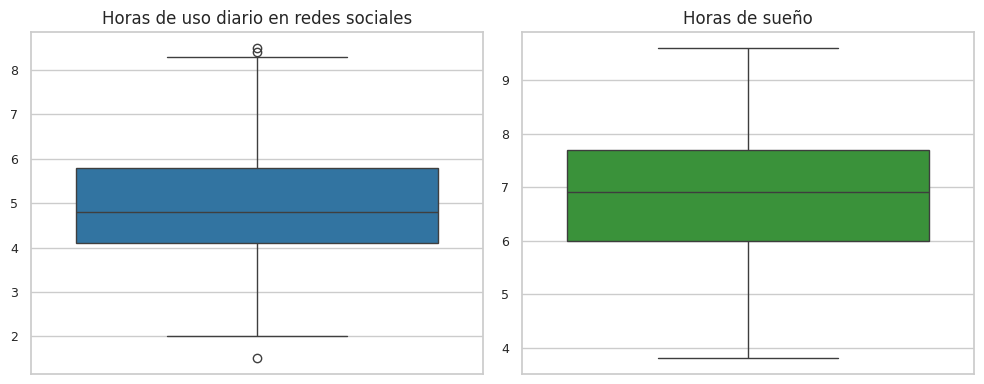

In [11]:
variables = ['Horas_Uso_Diario', 'Horas_Sueño']
titulos = ['Horas de uso diario en redes sociales','Horas de sueño']
etiquetas = ['', '']

fig, axes = plt.subplots(1, len(variables), figsize=(10,4))

for i, (ax, variable, titulo, etiqueta) in enumerate(zip(axes, variables, titulos, etiquetas)):
    sns.boxplot(
        y=variable,
        data=df,
        color=academic_palette[i % len(academic_palette)],
        ax=ax
    )
    ax.set_title(titulo, fontsize=12)
    ax.set_ylabel(etiqueta, fontsize=10)
    ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()

In [12]:
outlier_sumary= []
for ax, variable in zip (axes, variables):

  #Cálculo de outliers con IQR
  q1 = df[variable].quantile(0.25)
  q3 = df[variable].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR
  outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

  n_outliers = len (outliers)
  pct_outliers = (n_outliers / len (df)) * 100

  outlier_sumary.append({
      'variable': variable,
      'N_outliers': n_outliers,
      '% outliers': pct_outliers
  })

  outliers_df = pd.DataFrame(outlier_sumary)
outliers_df

,variable,N_outliers,% outliers
0,Horas_Uso_Diario,3,0.425532
1,Horas_Sueño,0,0.000000


In [13]:
#Cálculo de cuartiles
Q1 = df['Horas_Uso_Diario'].quantile(0.25)
Q3 = df['Horas_Uso_Diario'].quantile(0.75)

#Cálculo de rango intercuartil
IQR = Q3 - Q1

print ("\nRango Intercuartil")
print (IQR)
print ("\nCuartiles")
print (Q1, Q3)

#Limites para detectar outliers
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
print ("\nLimites para detectar outliers")
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')


Rango Intercuartil
1.7000000000000002

Cuartiles
4.1 5.8

Limites para detectar outliers
Lower bound: 1.5499999999999994
Upper bound: 8.35


Podemos concluir que existen tanto outliers interiores como superiores

In [14]:
#Identificación de outliers

outliers = df[(df['Horas_Uso_Diario'] < lower_bound) | (df['Horas_Uso_Diario'] > upper_bound)]
len (outliers), len (outliers)/len(df) *100

(3, 0.425531914893617)

**Conclusión sobre los outliers en Horas de uso diario y horas de sueño**
En el análisis de las variables numéricas se observó que los únicos outliers presentes corresponden a la variable horas de uso diario en redes sociales. Estos casos representan estudiantes que reportan un tiempo de conexión  alto o superior a lo esperado en la mayoría de la muestra. Aunque su proporción dentro del conjunto de datos es baja (0,42 %), resultan relevantes porque reflejan hábitos poco comunes que pueden sesgar las medidas de tendencia central. Por este motivo, se decidió mantenerlos en el análisis, destacando que se interpretan como situaciones excepcionales que enriquecen la comprensión del fenómeno de la adicción a las redes sociales.


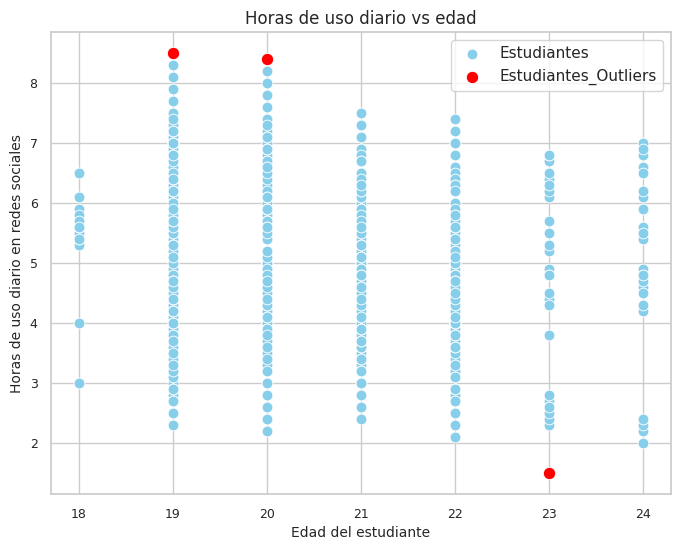

In [15]:
# Calculo límites con IQR para detectar outliers en Horas_Uso_Diario
Q1 = df['Horas_Uso_Diario'].quantile(0.25)
Q3 = df['Horas_Uso_Diario'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtro outliers
outliers = df[(df['Horas_Uso_Diario'] < lower_bound) | (df['Horas_Uso_Diario'] > upper_bound)]

# Gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Edad'], y=df['Horas_Uso_Diario'], color="skyblue", s=60, label="Estudiantes")
sns.scatterplot(x=outliers['Edad'], y=outliers['Horas_Uso_Diario'], color="red", s=80, label="Estudiantes_Outliers")

plt.title("Horas de uso diario vs edad", fontsize=12)
plt.xlabel("Edad del estudiante", fontsize=10)
plt.ylabel("Horas de uso diario en redes sociales", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend()
plt.show()

**Conclusión sobre los outliers**
Los outliers identificados corresponden a estudiantes que reportan un uso muy elevado de redes sociales. Aunque son pocos, su presencia es relevante porque muestran perfiles de consumo poco comunes.

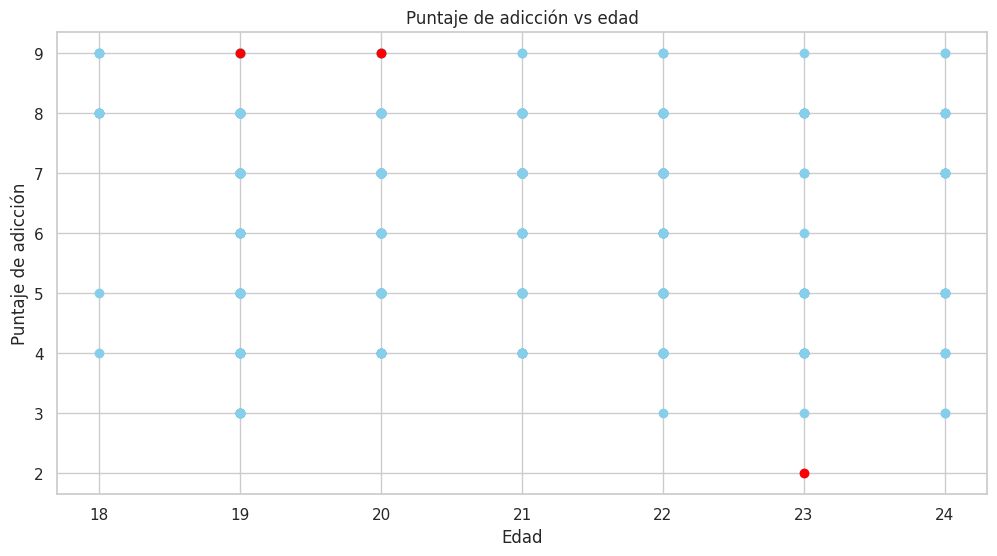

In [16]:
# Detección de outliers para puntaje de adicción

plt.figure(figsize=(12,6))

# Gráfico de dispersión con todos los datos
plt.scatter(df['Edad'], df['Puntaje_Adicción'], color='skyblue', label='Estudiantes')

# Gráfico de dispersión con los outliers (suponiendo que ya los detectaste en un DataFrame llamado outliers)
plt.scatter(outliers['Edad'], outliers['Puntaje_Adicción'], color='red', label='Estudiantes_Outliers')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Puntaje de adicción')
plt.title('Puntaje de adicción vs edad')
plt.show()

Este gráfico de dispersión muestra la relación entre la edad de los estudiantes y su puntaje de adicción.
Los puntos resaltados en rojo corresponden a outliers detectados.


In [17]:
# Función para calcular outliers con IQR
def resumen_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100

    return {
        "Variable": variable,
        "N_outliers": n_outliers,
        "%_outliers": round(pct_outliers, 2)
    }

# Aplicar a las variables de interés
variables = ["Horas_Uso_Diario", "Horas_Sueño", "Puntaje_Adicción"]
outliers_resumen = [resumen_outliers(df, var) for var in variables]

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers_resumen)

# Mostrar tabla resumen
print(outliers_df)

           Variable  N_outliers  %_outliers
0  Horas_Uso_Diario           3        0.43
1       Horas_Sueño           0        0.00
2  Puntaje_Adicción           0        0.00


Al igual que el gráfico anterior el procentaje de outliers es bajo.

**Mapa de calor de correlaciones**


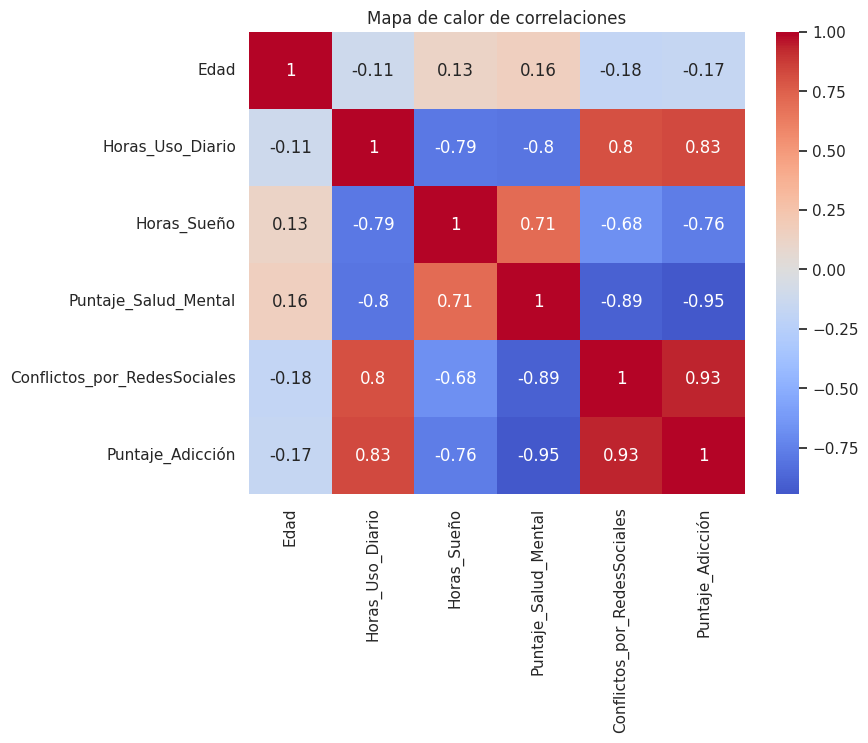

In [18]:
# Revisamos las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Excluila columna ID_Estudiante si existe
if 'ID_Estudiante' in numeric_cols:
    numeric_cols = numeric_cols.drop('ID_Estudiante')

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()

**El puntaje de adicción se relaciona con las demás variables.**

- Edad ↔ Puntaje de adicción:  los estudiantes de mayor edad tienden a tener puntajes más altos de adicción.
- Horas de uso de redes ↔ Puntaje de adicción:  A mayor tiempo en redes, mayor nivel de adicción.
- Rendimiento académico ↔ Puntaje de adicción: un mayor puntaje de adicción se asocia con menor rendimiento académico.

Se observa una fuerte correlación positiva entre horas de uso diario y puntaje de adicción (0.83), y una correlación negativa entre horas de sueño y puntaje de adicción (-0.76). Esto confirma que el uso excesivo de redes sociales se asocia con mayor adicción y menor descanso.


## 5. Distribución univariada de la variable objetivo
- Histograma de puntaje de adicción
---


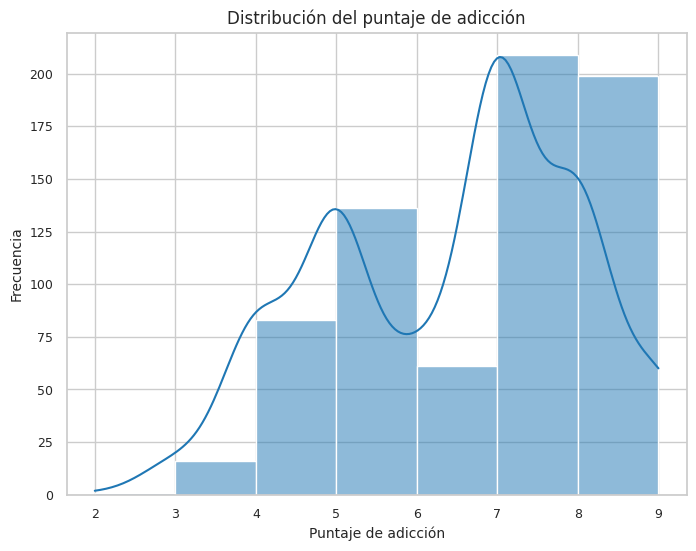

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(
    df['Puntaje_Adicción'],
    bins=7,
    kde=True,
    color=academic_palette[0]
)
plt.title("Distribución del puntaje de adicción", fontsize=12)
plt.xlabel("Puntaje de adicción", fontsize=10)
plt.ylabel("Frecuencia", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

**Interpretación**

La distribución del puntaje de adicción se concentra en valores medios y altos, con una mediana de 7. Esto confirma que la mayoría de los estudiantes perciben niveles significativos de adicción a las redes sociales.


## 6. Análisis bivariado
- Gráficos comparativos:
  - Género vs puntaje de adicción.
  - Nivel académico vs horas de uso.
  - Horas de uso vs puntaje de adicción.
- **Interpretación narrativa**: explicar las tendencias observadas en cada gráfico.

---


a) Diferencia del nivel de adicción por Género, Nivel de Estudio, estado civil.

¿Existe una diferencia significativa en el nivel de adicción según el género o el nivel de estudio o estado civil?

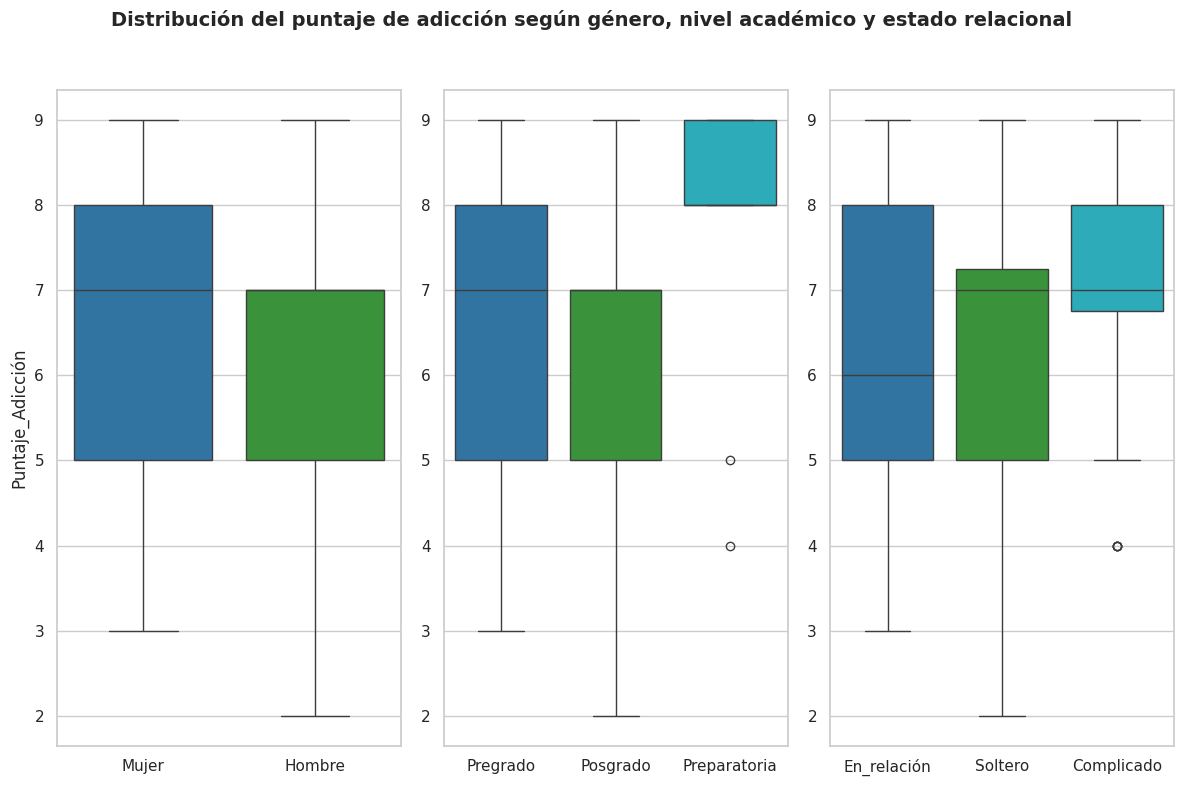

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12,8))

# 1. Puntaje de adicción según género
sns.boxplot(
    x='Género', y='Puntaje_Adicción',
    hue='Género', data=df,
    palette=academic_palette[:df['Género'].nunique()],
    legend=False, ax=axes[0],
)

# 2. Nivel de adicción según nivel académico
sns.boxplot(
    x='Nivel_Académico', y='Puntaje_Adicción',
    hue='Nivel_Académico', data=df,
    palette=academic_palette[:df['Nivel_Académico'].nunique()],
    legend=False, ax=axes[1]
)

# 3. Nivel de adicción según estado relacional
sns.boxplot(
    x='Estado_Relacional', y='Puntaje_Adicción',
    hue='Estado_Relacional', data=df,
    palette=academic_palette[:df['Estado_Relacional'].nunique()],
    legend=False, ax=axes[2]
)

# saco los label
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

axes[1].set_ylabel("")
axes[2].set_ylabel("")

fig.suptitle("Distribución del puntaje de adicción según género, nivel académico y estado relacional",
             fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Los resultados muestran diferencias en el puntaje de adicción según género, nivel académico y estado relacional. Las mujeres tienden a reportar valores ligeramente más altos, los estudiantes de pregrado concentran puntajes elevados, y los solteros muestran mayor variabilidad en comparación con otros grupos.

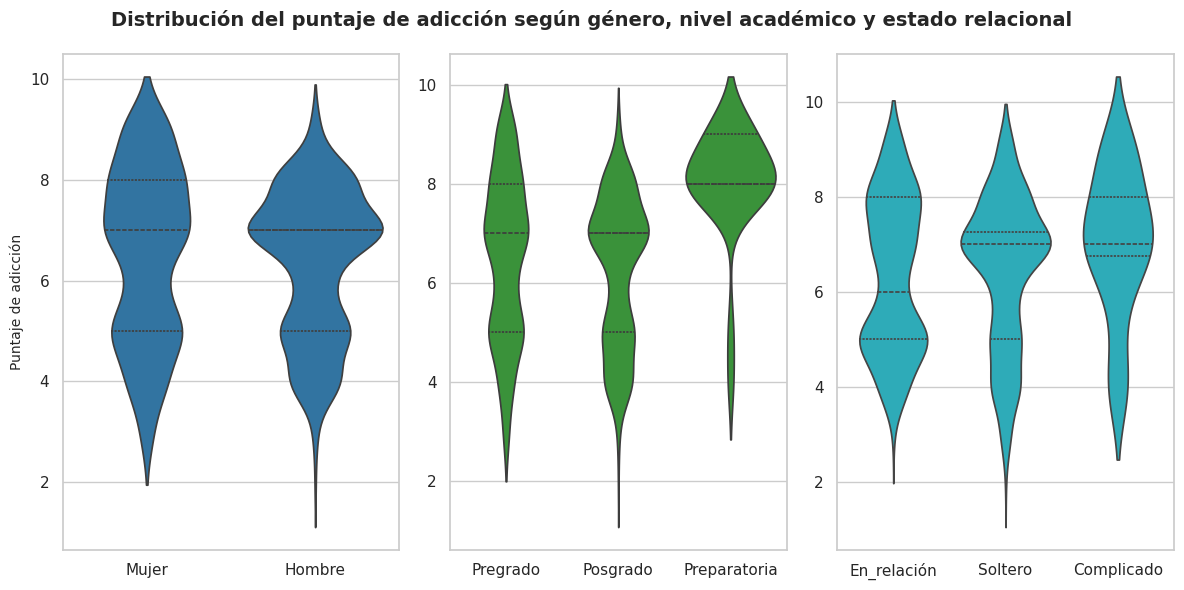

In [21]:
# Gráficos de violín
fig, axes = plt.subplots(1, 3, figsize=(12,6))

# 1. Puntaje de adicción según género
sns.violinplot(
    x=df['Género'], y=df['Puntaje_Adicción'],
    inner="quartile", ax=axes[0], color=academic_palette[0]
)
axes[0].set_xlabel("")
axes[0].set_ylabel("Puntaje de adicción", fontsize=10)

# 2. Puntaje de adicción según nivel académico
sns.violinplot(
    x=df['Nivel_Académico'], y=df['Puntaje_Adicción'],
    inner="quartile", ax=axes[1], color=academic_palette[1]
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# 3. Puntaje de adicción según estado relacional
sns.violinplot(
    x=df['Estado_Relacional'], y=df['Puntaje_Adicción'],
    inner="quartile", ax=axes[2], color=academic_palette[2]
)

axes[2].set_xlabel("")
axes[2].set_ylabel("")

fig.suptitle("Distribución del puntaje de adicción según género, nivel académico y estado relacional",
             fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

Los gráficos de violín permiten observar la distribución completa del puntaje de adicción en cada grupo.  

- **Género:** Se aprecia que las mujeres tienden a concentrar puntajes ligeramente más altos de adicción, aunque la dispersión es similar en ambos géneros.  
- **Nivel académico:**
Los estudiantes de **pregrado** muestran una mayor concentración en valores elevados, mientras que en **posgrado** la distribución es más equilibrada.

- **Estado relacional:** Los estudiantes **solteros** presentan mayor variabilidad en sus puntajes, lo que sugiere que la situación personal puede influir en los hábitos de uso de redes sociales.  

En conjunto, estos resultados refuerzan la idea de que la adicción a las redes sociales no es homogénea, sino que varía según características demográficas y contextuales de los estudiantes.

b) Relación entre Horas de Uso y Adicción

¿Cómo se relaciona el uso diario promedio con el puntaje de adicción?

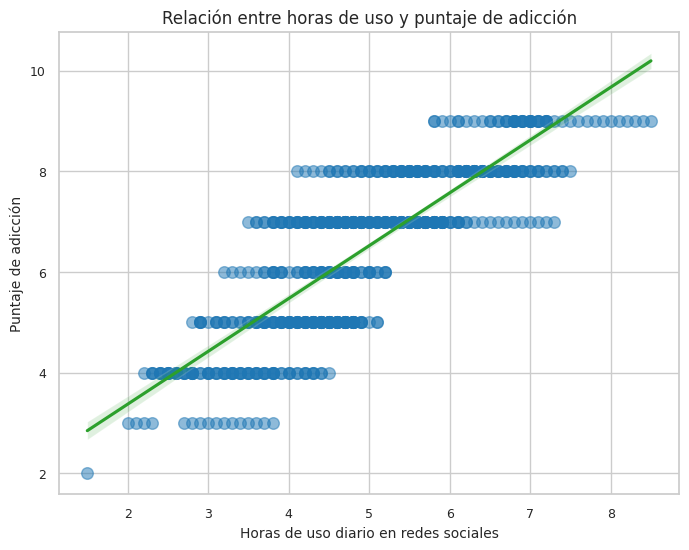

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(
    x=df['Horas_Uso_Diario'],
    y=df['Puntaje_Adicción'],
    scatter_kws={'color': academic_palette[0], 's':70, 'alpha':0.5},
    line_kws={'color': academic_palette[1]}
)
plt.title("Relación entre horas de uso y puntaje de adicción", fontsize=12)
plt.xlabel("Horas de uso diario en redes sociales", fontsize=10)
plt.ylabel("Puntaje de adicción", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

El gráfico confirma la correlación positiva entre horas de uso y puntaje de adicción:

- Los puntos en azul muestran que a medida que aumentan las horas de conexión, también se incrementa el nivel de adicción.
- La línea verde refuerza la tendencia lineal, indicando que el tiempo de uso es un predictor fuerte del riesgo.
- Esto valida lo observado en el mapa de calor: el uso diario es la variable más asociada con la adicción.


c) Conflictos sociales por nivel de adicción

¿A mayor nivel de adicción mayor nivel de conflicto social?

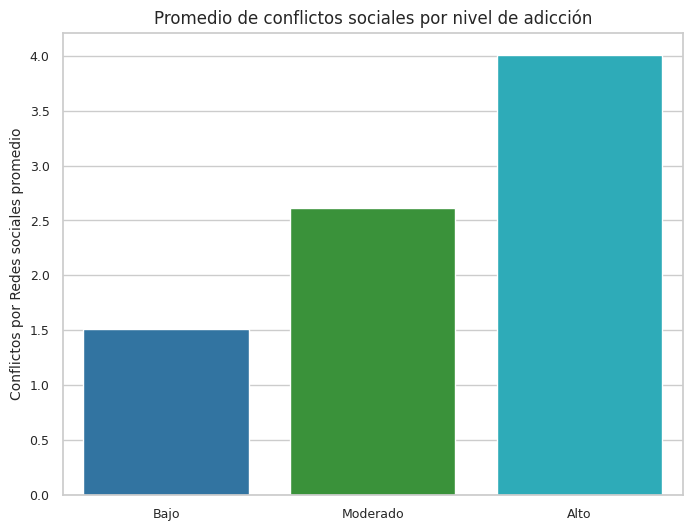

In [23]:
# Definir los niveles de adicción a partir de Puntaje_Adicción (escala 1-10)
bins = [0, 4, 7, 10]
labels = ['Bajo', 'Moderado', 'Alto']
df['Nivel_Adiccion'] = pd.cut(df['Puntaje_Adicción'], bins=bins, labels=labels, right=True)

# Calcular el promedio de conflictos por nivel de adicción
conflict_avg = df.groupby('Nivel_Adiccion', observed=False)['Conflictos_por_RedesSociales'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(
    x='Nivel_Adiccion',
    y='Conflictos_por_RedesSociales',
    hue='Nivel_Adiccion',
    data=conflict_avg,
    palette=academic_palette[:conflict_avg['Nivel_Adiccion'].nunique()],
    legend=False
)

plt.title("Promedio de conflictos sociales por nivel de adicción", fontsize=12)
plt.xlabel("")
plt.ylabel("Conflictos por Redes sociales promedio", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

El gráfico muestra que a mayor nivel de adicción, el promedio de conflictos sociales aumenta. Los estudiantes con adicción alta reportan significativamente más discusiones relacionadas con redes sociales que aquellos con niveles bajos o medios. Esto confirma que la adicción no solo afecta el rendimiento académico y el sueño, sino también la calidad de las relaciones interpersonales.

**Estudio: Qué plataforma es la mas usada, como se relacionan las 5 mas usadas con el nivel académico y el estado relacional.**

/tmp/ipython-input-3959872073.py:10: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


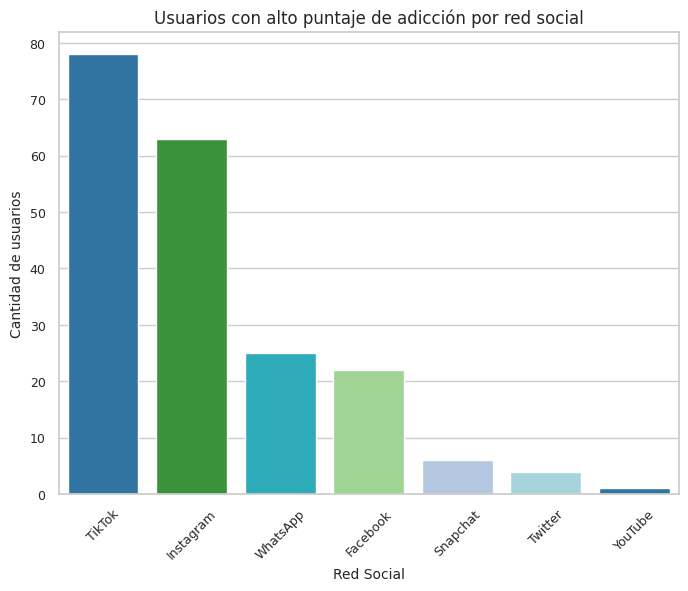

In [24]:
# Filtrar solo usuarios con nivel de adicción Alto
alto_df = df[df["Nivel_Adiccion"] == "Alto"]

# Contar usuarios por red social
social_counts = alto_df["Plataforma_Más_Usada"].value_counts().reset_index()
social_counts.columns = ["Red_Social", "Usuarios_Alto"]

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x="Red_Social",
    y="Usuarios_Alto",
    hue="Red_Social",
    data=social_counts,
    palette=academic_palette[:social_counts['Red_Social'].nunique()],
    legend=False
)
plt.title("Usuarios con alto puntaje de adicción por red social", fontsize=12)
plt.xlabel("Red Social", fontsize=10)
plt.ylabel("Cantidad de usuarios", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.show()



Este gráfico muestra qué plataformas concentran más estudiantes con nivel de adicción alto.

- Se observa que algunas redes sociales tienen una presencia mucho mayor en los casos de adicción severa.

- Esto sugiere que no todas las plataformas generan el mismo nivel de riesgo: ciertas redes parecen estar más asociadas con patrones de uso problemático.


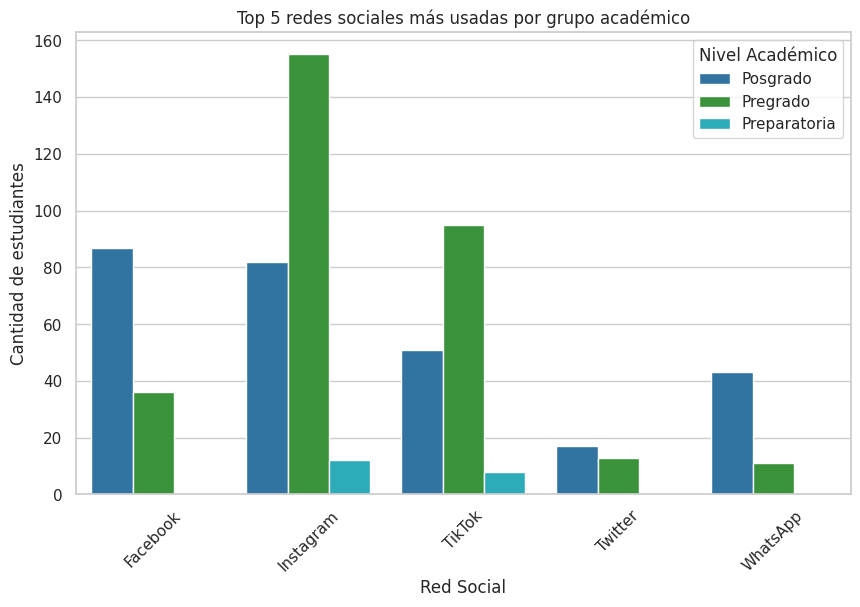

In [25]:
# Seleccionar las 5 plataformas más frecuentes
top5_platforms = df['Plataforma_Más_Usada'].value_counts().nlargest(5).index

# Filtrar dataset
filtered_df = df[df['Plataforma_Más_Usada'].isin(top5_platforms)]

# Contar por plataforma y nivel académico
platform_counts = (
    filtered_df.groupby(['Plataforma_Más_Usada','Nivel_Académico'])
    .size()
    .reset_index(name='Cantidad')
)
# Gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(x='Plataforma_Más_Usada', y='Cantidad', hue='Nivel_Académico', data=platform_counts)
plt.title('Top 5 redes sociales más usadas por grupo académico')
plt.xlabel('Red Social')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.legend(title='Nivel Académico')
plt.show()


Aquí se comparan las cinco plataformas más populares según el nivel académico de los estudiantes.

- Se nota que la preferencia por ciertas redes varía entre posgrado, pregrado y preparatoria.

- En niveles más bajos (preparatoria), la concentración en una o dos plataformas es más marcada, mientras que en niveles superiores (Posgrado) la distribución es más diversa.

- Esto indica que el contexto académico influye en la elección de la red social, y que la adicción puede manifestarse de manera distinta según el grupo educativo.


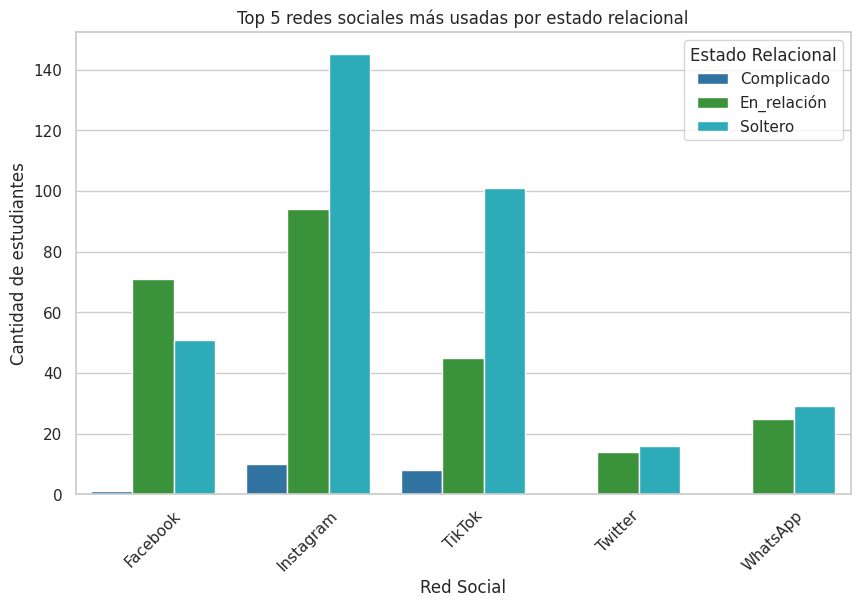

In [26]:
# Seleccionar las 5 plataformas más frecuentes
top5_platforms = df['Plataforma_Más_Usada'].value_counts().nlargest(5).index

# Filtrar dataset
filtered_df = df[df['Plataforma_Más_Usada'].isin(top5_platforms)]

# Contar por plataforma y estado relacional
platform_counts = (
    filtered_df.groupby(['Plataforma_Más_Usada','Estado_Relacional'])
    .size()
    .reset_index(name='Cantidad')
)

# Gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(x='Plataforma_Más_Usada', y='Cantidad', hue='Estado_Relacional', data=platform_counts)
plt.title('Top 5 redes sociales más usadas por estado relacional')
plt.xlabel('Red Social')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.legend(title='Estado Relacional')
plt.show()


Este gráfico explora la relación entre las plataformas más usadas y el estado relacional de los estudiantes (soltero, en pareja, etc.).

- Se observa que las preferencias cambian según la situación afectiva: por ejemplo, algunos estados relacionales muestran mayor inclinación hacia redes más visuales o interactivas.

- Esto sugiere que las redes sociales cumplen también una función social vinculada a la vida relacional, no solo académica.

## 7. Conclusión del EDA

El análisis exploratorio permitió comprender las características de los estudiantes y su relación con la adicción a redes sociales:

- La distribución del **puntaje de adicción** muestra una tendencia hacia valores medios-altos, lo que indica que el fenómeno está presente de manera significativa en la población estudiada.

- El **mapa de calor de correlaciones** evidenció relaciones fuertes: mayor tiempo de uso diario se asocia con menor cantidad de horas de sueño, peor salud mental y más conflictos sociales.

- El **análisis bivariado** reveló diferencias relevantes según género, nivel académico y estado relacional, sugiriendo que factores demográficos y personales influyen en la intensidad de la adicción.

En conjunto, el EDA confirma que la adicción a redes sociales no es un fenómeno aislado, sino que se relaciona con múltiples varibles.

Con estos hallazgos se avanza hacia la modelización con técnicas de Machine Learning para predecir y comprender mejor los factores de riesgo.



# Entrenamiento y optimización de modelos de Machine Learning

## 1. Crear la variable de riesgo

Se segmenta el puntaje. Una escala común en psicología para adicciones es:
0-40: Riesgo Bajo.
41-70: Riesgo Moderado.
71-100: Riesgo Alto (Adicción).


In [27]:
# Crear variable binaria: 1 si el puntaje de adicción es 7 o más, 0 en caso contrario
df["Riesgo_Binario"] = (df["Puntaje_Adicción"] >= 7).astype(int)

# Definir X e y, excluyendo ID, Puntaje_Adicción y Nivel_Adiccion
y = df["Riesgo_Binario"]
X = df.drop(columns=["Riesgo_Binario", "ID_Estudiante", "Puntaje_Adicción", "Nivel_Adiccion"], errors="ignore")

## 2. Detectar tipos de variables

In [28]:
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['Edad', 'Horas_Uso_Diario', 'Horas_Sueño', 'Puntaje_Salud_Mental', 'Conflictos_por_RedesSociales']
Categóricas: ['Género', 'Nivel_Académico', 'País', 'Plataforma_Más_Usada', 'Afecta_Rendimiento_Académico', 'Estado_Relacional']


## 3. Ingeniería de atributos

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer([
    ("num", num_transform, num_cols),
    ("cat", cat_transform, cat_cols)
])

## 4. Entrenamiento y validación

In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"roc_auc":"roc_auc","f1":"f1","recall":"recall","precision":"precision"}

# Modelos
modelos = {
    "Logistica": LogisticRegression(max_iter=1500, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
}

# Entrenamiento y evaluación
for nombre, clf in modelos.items():
    pipe = Pipeline([("prep", preprocess), ("clf", clf)])
    cv_res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, error_score="raise")
    print(f"\nModelo: {nombre}")
    for m in scoring.keys():
        print(f"{m.upper()}: {cv_res['test_'+m].mean():.3f} ± {cv_res['test_'+m].std():.3f}")


Modelo: Logistica
ROC_AUC: 1.000 ± 0.000
F1: 1.000 ± 0.000
RECALL: 1.000 ± 0.000
PRECISION: 1.000 ± 0.000

Modelo: RandomForest
ROC_AUC: 1.000 ± 0.000
F1: 1.000 ± 0.000
RECALL: 1.000 ± 0.000
PRECISION: 1.000 ± 0.000


## 5. Optimización de hiperparámetros

No hace falta optimización, porque se observa el máximo rendimiento posible con los parámetros por defecto.

Lo que si se prodría verificar y descartar que sea un caso de sobreajuste para poder elegir el modelo final.


## 6. Evaluación final en test


In [31]:
final_model = LogisticRegression(max_iter=1500, class_weight="balanced")
pipe = Pipeline([("prep", preprocess), ("clf", final_model)])
pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Matriz de confusión:
 [[58  1]
 [ 0 82]]
AUC: 0.9977263331955354
F1: 0.9939393939393939
Recall: 1.0
Precision: 0.9879518072289156


**Interpretación de la matriz de confusión**
- 58 estudiantes de riesgo bajo fueron correctamente clasificados.
- 1 estudiante de riesgo bajo fue clasificado como alto (falso positivo).
- 82 estudiantes de riesgo alto fueron correctamente clasificados.
- 0 estudiantes de riesgo alto fueron mal clasificados (no hubo falsos negativos)


**Métricas en test**
- AUC = 0.998 → Separación casi perfecta entre clases.
- F1 = 0.994 → Excelente balance entre precisión y recall.
- Recall = 1.0 → Detecta absolutamente todos los casos de alto riesgo.
- Precision = 0.988 → De los que predice como alto riesgo, casi todos realmente lo son.


# Conclusiones

Aunque ambos modelos son adecuados en valdación y tambien en el conjunto de prueba; se selecciona la Regresión Logística como modelo final por su desempeño y su interpretabilidad. Esto permite no solo predecir con alta precisión, sino también explicar qué factores contribuyen al riesgo de adicción en los estudiantes.
